In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
nobel = pd.read_csv("laureates.csv")

In [5]:
nobel.describe()

,id,year,share
count,975.000000,975.000000,975.000000
mean,496.221538,1972.471795,2.014359
std,290.594353,34.058064,0.943909
min,1.000000,1901.000000,1.000000
25%,244.500000,1948.500000,1.000000
50%,488.000000,1978.000000,2.000000
75%,746.500000,2001.000000,3.000000
max,1009.000000,2021.000000,4.000000


In [6]:
nobel.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901,physics,NaN,1,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903,physics,NaN,2,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903,physics,NaN,4,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


In [7]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 975 non-null    int64 
 1   firstname          975 non-null    object
 2   surname            945 non-null    object
 3   born               974 non-null    object
 4   died               975 non-null    object
 5   bornCountry        946 non-null    object
 6   bornCountryCode    946 non-null    object
 7   bornCity           943 non-null    object
 8   diedCountry        640 non-null    object
 9   diedCountryCode    640 non-null    object
 10  diedCity           634 non-null    object
 11  gender             975 non-null    object
 12  year               975 non-null    int64 
 13  category           975 non-null    object
 14  overallMotivation  23 non-null     object
 15  share              975 non-null    int64 
 16  motivation         975 non-null    object
 1

In [10]:
nobel[nobel["surname"] == "Feynman"].year

86    1965
Name: year, dtype: int64

In [11]:
nobel.loc[nobel["surname"] == "Feynman","year"]

86    1965
Name: year, dtype: int64

In [15]:
nobel.loc[nobel["firstname"] == "Kip S."].year

916    2017
Name: year, dtype: int64

In [19]:
nobel.loc[nobel["firstname"].str.contains("Kip")]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
916,943,Kip S.,Thorne,1940-06-01,0000-00-00,USA,US,Logan UT,NaN,NaN,NaN,male,2017,physics,NaN,4,"""for decisive contributions to the LIGO detect...",LIGO/VIRGO Collaboration,NaN,NaN


In [21]:
len(nobel.loc[nobel["surname"].str.contains("Feynman", na=False)])

1

In [24]:
curies = nobel.loc[nobel["surname"].str.contains("Curie", na=False)]
curies

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903,physics,NaN,4,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France
5,6,Marie,Curie,1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1903,physics,NaN,4,"""in recognition of the extraordinary services ...",NaN,NaN,NaN
6,6,Marie,Curie,1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1911,chemistry,NaN,1,"""in recognition of her services to the advance...",Sorbonne University,Paris,France
191,194,Irène,Joliot-Curie,1897-09-12,1956-03-17,France,FR,Paris,France,FR,Paris,female,1935,chemistry,NaN,2,"""in recognition of their synthesis of new radi...",Institut du Radium,Paris,France


In [25]:
curies[["firstname", "surname"]]

,firstname,surname
4,Pierre,Curie
5,Marie,Curie
6,Marie,Curie
191,Irène,Joliot-Curie


In [29]:
nobel.groupby(["firstname", "surname"]).size().sort_values()

firstname     surname 
A. Michael    Spence      1
Nicolay G.    Basov       1
Niels         Bohr        1
Niels K.      Jerne       1
Niels Ryberg  Finsen      1
                         ..
Élie          Ducommun    1
Linus         Pauling     2
John          Bardeen     2
Frederick     Sanger      2
Marie         Curie       2
Length: 941, dtype: int64

In [31]:
laureates = nobel.groupby(["id", "firstname", "surname"])
sizes = laureates.size()
sizes

id    firstname       surname  
1     Wilhelm Conrad  Röntgen      1
2     Hendrik A.      Lorentz      1
3     Pieter          Zeeman       1
4     Henri           Becquerel    1
5     Pierre          Curie        1
                                  ..
1005  Maria           Ressa        1
1006  Dmitry          Muratov      1
1007  David           Card         1
1008  Joshua          Angrist      1
1009  Guido           Imbens       1
Length: 941, dtype: int64

In [32]:
sizes[sizes > 1]

id   firstname  surname
6    Marie      Curie      2
66   John       Bardeen    2
217  Linus      Pauling    2
222  Frederick  Sanger     2
dtype: int64

In [33]:
nobel.loc[nobel["born"] == "1879-03-14"]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
25,26,Albert,Einstein,1879-03-14,1955-04-18,Germany,DE,Ulm,USA,US,Princeton NJ,male,1921,physics,NaN,1,"""for his services to Theoretical Physics and e...",Kaiser-Wilhelm-Institut (now Max-Planck-Instit...,Berlin,Germany


In [36]:
nobel.loc[(nobel["born"].str.contains("10-23", na=False))]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
57,58,Felix,Bloch,1905-10-23,1983-09-10,Switzerland,CH,Zurich,Switzerland,CH,Zurich,male,1952,physics,NaN,2,"""for their development of new methods for nucl...",Stanford University,Stanford CA,USA
705,721,Il´ja M.,Frank,1908-10-23,1990-06-22,Russia,RU,Leningrad (now St. Petersburg),USSR (now Russia),RU,Moscow,male,1958,physics,NaN,3,"""for the discovery and the interpretation of t...",Lomonosov Moscow State University,Moscow,USSR (now Russia)


In [37]:
nobel.loc[(nobel["born"].str.contains("06-28", na=False)) & 
         (nobel["category"] == "physics")]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
79,79,Maria,Goeppert Mayer,1906-06-28,1972-02-20,Germany (now Poland),PL,Kattowitz (now Katowice),USA,US,San Diego CA,female,1963,physics,NaN,4,"""for their discoveries concerning nuclear shel...",University of California,San Diego CA,USA
125,126,Klaus,von Klitzing,1943-06-28,0000-00-00,German-occupied Poland (now Poland),PL,Schroda,NaN,NaN,NaN,male,1985,physics,NaN,1,"""for the discovery of the quantized Hall effect""",Max-Planck-Institut für Festkörperforschung,Stuttgart,Germany


In [38]:
bethe = nobel.loc[nobel["surname"] == "Bethe"]

In [39]:
bethe["born"]

88    1906-07-02
Name: born, dtype: object

In [40]:
diff = pd.to_datetime(bethe["died"]) - pd.to_datetime(bethe["born"])

In [42]:
diff/np.timedelta64(1,"Y")

88    98.679644
dtype: float64

In [43]:
nobel.loc[nobel["born"] == "1873-00-00"]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
465,467,Institute of International Law,NaN,1873-00-00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,org,1904,peace,NaN,1,"""for its striving in public law to develop pea...",NaN,NaN,NaN


In [44]:
nobel["born"] = pd.to_datetime(nobel["born"], errors="coerce")
nobel["died"] = pd.to_datetime(nobel["died"], errors="coerce")

In [45]:
nobel.iloc[465].born

NaT

In [47]:
nobel["lifespan"] = (nobel["died"] - nobel["born"])/np.timedelta64(1, "Y")

In [48]:
nobel.loc[nobel["surname"] == "Bethe"]["lifespan"]

88    98.679644
Name: lifespan, dtype: float64

array([[<AxesSubplot: title={'center': 'lifespan'}>]], dtype=object)

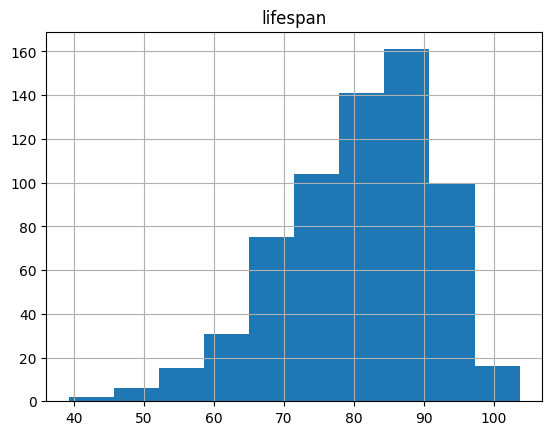

In [50]:
nobel.hist(column="lifespan")

In [51]:
nobel.loc[nobel["firstname"].str.contains("Frédéric")]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,lifespan
190,193,Frédéric,Joliot,1900-03-19,1958-08-14,France,FR,Paris,France,FR,...,male,1935,chemistry,NaN,2,"""in recognition of their synthesis of new radi...",Institut du Radium,Paris,France,58.405032
461,463,Frédéric,Passy,1822-05-20,1912-06-12,France,FR,Paris,France,FR,...,male,1901,peace,NaN,2,"""for his lifelong work for international peace...",NaN,NaN,NaN,90.063451
568,573,Frédéric,Mistral,1830-09-08,1914-03-25,France,FR,Maillane,France,FR,...,male,1904,literature,NaN,2,"""in recognition of the fresh originality and t...",NaN,NaN,NaN,83.541757


In [62]:
laureates = nobel.groupby(["id", "firstname", "surname"])
sizes = laureates.size()
multiple_prizes = sizes[sizes > 1]
multiple_prizes_df = nobel[nobel["id"].isin(multiple_prizes.index.get_level_values("id"))]
multiple_prizes_df[["id", "firstname", "surname", "category"]]

,id,firstname,surname,category
5,6,Marie,Curie,physics
6,6,Marie,Curie,chemistry
65,66,John,Bardeen,physics
66,66,John,Bardeen,physics
214,217,Linus,Pauling,peace
215,217,Linus,Pauling,chemistry
220,222,Frederick,Sanger,chemistry
221,222,Frederick,Sanger,chemistry


In [69]:
laureates = nobel.groupby(["id", "firstname", "surname"])
sizes = laureates.size()
sizes[sizes > 1]

id   firstname  surname
6    Marie      Curie      2
66   John       Bardeen    2
217  Linus      Pauling    2
222  Frederick  Sanger     2
dtype: int64

In [77]:
nobel[nobel["surname"] == "Sanger"]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,...,gender,year,category,overallMotivation,share,motivation,name,city,country,lifespan
220,222,Frederick,Sanger,1918-08-13,2013-11-19,United Kingdom,GB,Rendcombe,United Kingdom,GB,...,male,1958,chemistry,NaN,1,"""for his work on the structure of proteins esp...",University of Cambridge,Cambridge,United Kingdom,95.27095
221,222,Frederick,Sanger,1918-08-13,2013-11-19,United Kingdom,GB,Rendcombe,United Kingdom,GB,...,male,1980,chemistry,NaN,4,"""for their contributions concerning the determ...",MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,95.27095


array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'born'}>],
       [<AxesSubplot: title={'center': 'died'}>,
        <AxesSubplot: title={'center': 'year'}>],
       [<AxesSubplot: title={'center': 'share'}>,
        <AxesSubplot: title={'center': 'lifespan'}>]], dtype=object)

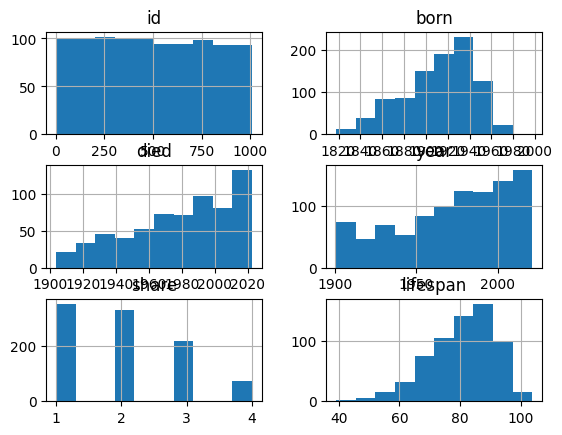

In [78]:
nobel.hist()